In [ ]:
from dataclasses import dataclass
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import spsolve
import numpy as np
import cv2
import matplotlib.pyplot as plt

# POISSON EDITING USING LAPLACIAN EQUATION 

In [ ]:
import numpy as np
from scipy.sparse import lil_matrix, csr_matrix, csc_matrix
from scipy.sparse.linalg import spsolve

def sol_Laplace_Equation_Axb(f, dom2Inp, source, offset):
    """
    f-------------> target image 
    dom2Inp-------> mask image 
    source---------> source image 
    offset---------> position on target image
    """
        
    # Define the region of the target where the source will be blended using the offset
    y_start, y_end = offset[1], offset[1] + dom2Inp.shape[0]
    x_start, x_end = offset[0], offset[0] + dom2Inp.shape[1]
    
    # Adjusting the mask dimensions to match target's region
    target_mask = np.zeros_like(f[:,:,0])
    target_mask[y_start:y_end, x_start:x_end] = dom2Inp

    # Adjusting the source region to be blended
    source_region = source[0:dom2Inp.shape[0], 0:dom2Inp.shape[1]]

    # Adjusting the Laplacian matrix based on the target region
    n = y_end - y_start
    m = x_end - x_start

    i = []
    j = []
    v = []
    
 
    for x in range(m):
        for y in range(n):
            k = x + y * m
            if target_mask[y+y_start, x+x_start]:
                indices = [k]
                values = [4]
                
                # Check left neighbor
                if x > 0:
                    indices.append(k-1)
                    values.append(-1)
                    
                # Check right neighbor
                if x < m - 1:
                    indices.append(k+1)
                    values.append(-1)
                    
                # Check top neighbor
                if y > 0:
                    indices.append(k-m)
                    values.append(-1)
                    
                # Check bottom neighbor
                if y < n - 1:
                    indices.append(k+m)
                    values.append(-1)

                i.extend([k]*len(indices))
                j.extend(indices)
                v.extend(values)
                
            else:
                i.append(k)
                j.append(k)
                v.append(1)

    mat_A = sparse(i, j, v, m*n, m*n).tocsc()

    # Blending each channel of the source into the target
    mask_flat = target_mask[y_start:y_end, x_start:x_end].flatten()
    for channel in range(source_region.shape[2]):
        source_flat = source_region[:, :, channel].flatten()
        target_flat = f[y_start:y_end, x_start:x_end, channel].flatten()

        # Using the Laplacian blend method
        alpha = 1
        mat_b = mat_A.dot(source_flat) * alpha

        mat_b[mask_flat == 0] = target_flat[mask_flat == 0]

        x = spsolve(mat_A, mat_b)
        x = x.reshape((y_end - y_start, x_end - x_start))
        x[x > 255] = 255
        x[x < 0] = 0
        x = x.astype('uint8')

        f[y_start:y_end, x_start:x_end, channel] = x

    return f

# Creation of the sparse matrix
def sparse(i, j, v, m, n):
    return csr_matrix((v, (i, j)), shape=(m, n))


In [ ]:
# Define the directories for your images

source = cv2.imread('/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/penguin.jpg')
source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)

mask = cv2.imread('/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/PENGUIN MASK.png')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

target = cv2.imread('/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/PENGUIN BACKGROUND.JPG')
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)


print(f"target shape: {target.shape}")
print(f"source shape: {source.shape}")
print(f"mask shape:   {mask.shape}")
result = sol_Laplace_Equation_Axb(f=target,dom2Inp=mask,source=source,offset=(450, 1800))
plt.figure(figsize=(7,7))
plt.imshow(result)



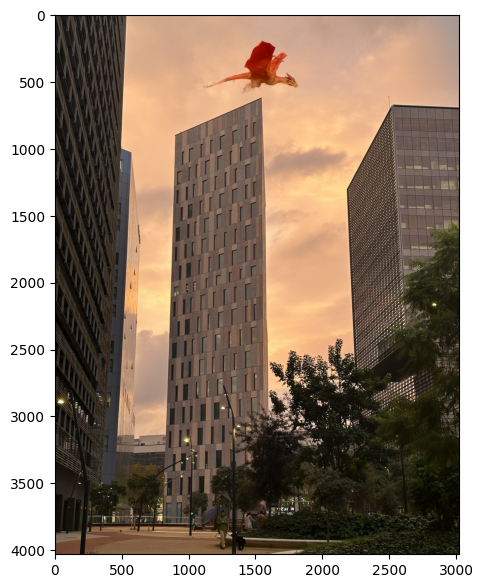

In [5]:
source = cv2.imread("/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/DRAGON SOURCE.jpeg")
source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
# source = cv2.resize(source,(400,400))

mask   = cv2.imread("/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/DRAGON mask 2.png")
# mask = cv2.resize(mask,(200,200))

mask   = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
target = cv2.imread("/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/TARGET.jpg")
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
# target = cv2.resize(target,(200,200))


print(f"target shape: {target.shape}")
print(f"source shape: {source.shape}")
print(f"mask shape:   {mask.shape}")
result = sol_Laplace_Equation_Axb(f=target,dom2Inp=mask,source=source,offset=(850, 100))
plt.figure(figsize=(7,7))
plt.imshow(result)

target shape: (698, 938, 3)
source shape: (398, 606, 3)
mask shape:   (398, 606)


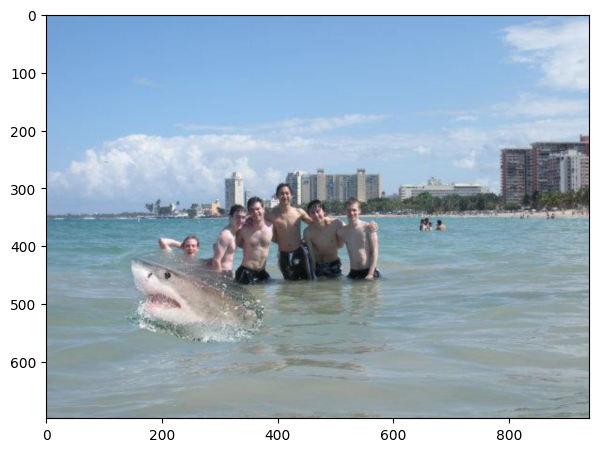

In [7]:
source = cv2.imread("/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/source_shark.png")
source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
# source = cv2.resize(source,(400,400))

mask   = cv2.imread("/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/mask_shark.png")
# mask = cv2.resize(mask,(200,200))

mask   = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
target = cv2.imread("/Users/dianatat/Documents/Master/C2 Optimisation techniques for CV/Project/week2/code/pictures/target_shark.png")
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
# target = cv2.resize(target,(200,200))


print(f"target shape: {target.shape}")
print(f"source shape: {source.shape}")
print(f"mask shape:   {mask.shape}")
result = sol_Laplace_Equation_Axb(f=target,dom2Inp=mask,source=source,offset=(50, 300))
plt.figure(figsize=(7,7))
plt.imshow(result)